<a href="https://colab.research.google.com/github/BeBrave-BeHumble/Machine_Learning/blob/main/ADP/Chapter_5_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%ED%94%84%EB%A1%9C%EC%84%B8%EC%8A%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 1. 머신러닝의 의미

머신러닝은 데이터의 훈련 샘플들을 학습해 데이터의 규칙과 패턴을 학습하여 결과를 예측하는 알고리즘과 시스템을 연구하는 분야이다.


# Section 2. 머신러닝 분석 프로세스 설명

1. 데이터 확인
  
  - 독립변수, 종속변수 유무 확인 (종속 없으면 비지도)
  - 연속형 vs 범주형 확인 (범주형 경우 분할 전 원핫인코딩 or 라벨인코딩)
  - 적용 가능한 분석모델 확인 (회귀/분류/비지도)

2. 데이터 분할
  
  - train:validation:test = 60~80: 10~20: 10~20
  - 교차검증 (for 데이터 크기가 작거나 검증 결과 일반화)

3. 전처리

  - 표준화 or 정규화
  - 결측치 확인 후 처리
  - 이상치 확인 후 처리

4. 모델학습

  - 머신러닝 알고리즘 적용 (회귀/분류/비지도)
  - 최적모델 결정하기 위해 하이퍼 파라미터 탐색 (train으로 학습, validation으로 결과 확인 및 최적 파라미터 탐색, 결정)
  
  5. 성능평가

  - test set에 최종 모델 적용
  - test set에 대한 정확도를 머신러닝 분석에 대한 성능으로 제시

# Section 3. 성능평가 기법

## 1.회귀분석

회귀분석에서는 실젯값과 예측값의 차이를 기반으로한 지표들을 중심으로 성능평가 지표가 발전해왔다.

1. MAE (Mean Absolute Error)

- 정의: 실젯값과 예측값의 차이를 절댓값으로 변환해 평균한 것
- 특징: 에러의 크기가 그대로 반영, 이상치에 영향 받음
- 코드:

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)

2. MSE (Mean Squared Error)

- 정의: 실젯값과 예측값의 차이를 제곱해 평균한 것
- 특징: 실젯값과 예측값 차이의 면적 합을 의미, 특이값이 존재하면 수치가 증가
- 코드:

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)

3. RMSE (Root Mean Squared Error)

- 정의: 실젯값과 예측값의 차이를 제곱해 평균한 것에 루트를 씌운 것
- 특징: 에러에 제곱을 하면 에러가 클수록 그에 따른 가중치가 높이 반영. 이때, 손실이 기하급수적으로 증가하는 상황에서 실제 오류평균보다 값이 더 커지지 않도록 상쇄하기 위해 사용
- 코드:

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

4. MSLE (Mean Squared Log Error)

- 정의: 실젯값과 예측값의 차이를 제곱해 평균한 것에 로그를 씌운 것
- 특징: RMSE와 같이 손실이 기하급수적으로 증가하는 상황에서 실제 오류평균보다 값이 더 커지지 않도록 상쇄하기 위해 사용
- 코드:

In [ ]:
from sklearn.metrics import mean_squared_log_error
msle = mean_squared_log_error(y_test, y_pred)

5. MAPE (Mean Absolute Percentage Error)

- 정의: MAE를 퍼센트로 변환한 것
- 특징: 오차가 예측값에서 차지하는 정도를 나타냄
- 코드:

In [ ]:
import numpy as np
def MAPE(y_test, y_pred) :
    mape = np.mean(np.abs((y_test - y_pred)/y_test)) * 100
    return mape
mape = MAPE(y_test, y_pred)

## 2.분류분석

이진분류에서 단순히 정확도로만 모델 평가했을 때 잘못된 평가 결과를 가질 수 있다.

1. 정확도 (Accuracy)

- 정의: 실제 데이터에서 예측 데이터가 얼마나 같은지 판단하는 지표
- 특징: 데이터 구성에 따라 성능을 왜곡할 가능성 있음
- 수식: TP+TN/(TP+TN+FP+FN)
- 코드:

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)

2. 혼동행렬 (Confusion Matrix)

- 정의: 이진 분류의 예측오류가 얼마이고 어떠한 유형의 예측 오류가 발생하고 있는지 나타내는 지표
- 특징: 정확도의 한계점을 보완함
- 코드:

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

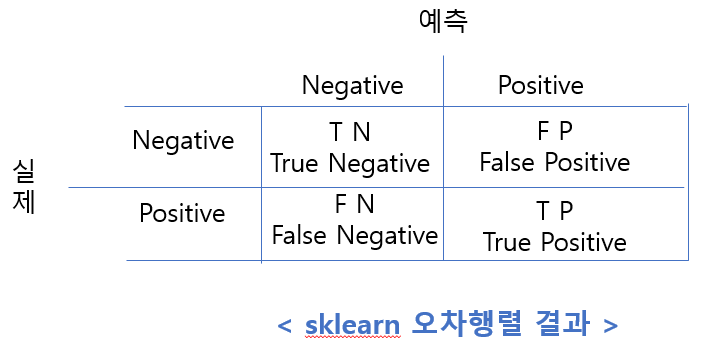

3. 정밀도(Precision)와 재현율(Recall)

  정밀도와 재현율은 **positive 데이터 예측에 집중**한 성능평가지표이다.

  1) 정밀도 = 양성 예측도 = precision
- 정의: Positive로 예측한 것 중, 실제로도 Positive인 것의 비율
- 특징: Positive 예측성능을 더욱 정밀하게 측정하기 위한 평가지표, 실제 Negative인 데이터를 positive로 잘못 예측했을 때 큰 영향이 발생하는 경우 활용. (ex: 스팸메일이 아닌데, 스팸으로 분류해버리는 경우)
- 수식: 진짜 양성/양성 예측 = TP / (TP+FP)
- 코드:

In [ ]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)

  2) 재현율 = 민감도 = recall = sensitivity = TPR
- 정의: 실제 Positive 중(TP+FN), Positive로 예측한 것(TP)의 비율
- 특징: 실제 Positive인 데이터를 Negative로 잘못 예측했을 때 큰 영향이 발생하는 경우 활용 가능. (ex: 암, 채무불이행)
- 수식: 양성 예측/진짜 양성 중에 = TP / (TP+FN)
- 코드:

In [ ]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)

  3) 정밀도와 재현율의 trade-off

  분류 결정 임계값(Threshold)을 조정함으로써 정밀도 or 재현율의 수치를 조절할 수 있다. 하지만 이 둘은 상충관계이므로, 한쪽을 높이면 다른 하나가 떨어진다. 따라서 두 평가지표 수치가 적절한 조화 이루도록 평가해야 한다.

4. F1 스코어

- 정의: 실제 Positive 중 Positive로 예측한 것들의 비율
- 특징: 정밀도와 재현율을 결합한 것으로, 둘의 조화 평균
- 수식: F1 = 2 / {(1/recall) + (1/precision)} = 2 * (precision*recall)/(precision+recall)
- 코드:

In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)

5. ROC 곡선과 AUC

  1) ROC 곡선

- 정의: FPR이 변할 때(x축) TPR이 변하는 것(y축)을 나타내는 곡선
- 특징: 우상향 그래프
- 수식: FPR = FP/(FP+TN) = 1-TNP = 1-specificity
- 코드:

In [ ]:
from sklearn.metrics import roc_curve
# FPR, TPR, 임계값 할당
fpr, tpr, thres = roc_curve(y_test, y_pred, pos_label = 1)
# ROC curve 그리기
import matplotlib.pyplot as plt
plt.plot(fpr, tpf)

  2) AUC 스코어

- 정의: ROC 곡선 아래 면적, 1에 가까울수록 예측 성능 우수
- 특징: AUC값이 커지려면 FPR이 작을 때 TPR 값이 커야함.
- 코드:

In [ ]:
from sklearn.metrics import roc_curve, auc
# FPR, TPR, 임계값 할당하기
fpr, tpr, thres = roc_curve(y_test, y_pred, pos_label = 1)
# AUC
auc = auc(fpr, tpr) # (x, y)

# Section 4. 회귀분석

## 1.데이터 확인

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
import pandas as pd
df = pd.read_csv('/content/gdrive/MyDrive/CodingTest/data_science/빅데이터분석기사/data/실기2/boston_housing.csv')

In [3]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,pratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.shape

(506, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   crim    506 non-null    float64
 1   zn      506 non-null    float64
 2   indus   506 non-null    float64
 3   chas    506 non-null    int64  
 4   nox     506 non-null    float64
 5   rm      506 non-null    float64
 6   age     506 non-null    float64
 7   dis     506 non-null    float64
 8   rad     506 non-null    int64  
 9   tax     506 non-null    int64  
 10  pratio  506 non-null    float64
 11  b       506 non-null    float64
 12  lstat   506 non-null    float64
 13  medv    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
# 결측치 파악
df.isna().sum()

crim      0
zn        0
indus     0
chas      0
nox       0
rm        0
age       0
dis       0
rad       0
tax       0
pratio    0
b         0
lstat     0
medv      0
dtype: int64

범주형인 chas 변수를 제외한 변수들과 주택가격(medv) 사이의 선형관계 파악 위해 산점도와 선형 회귀직선을 시각화 해보자.

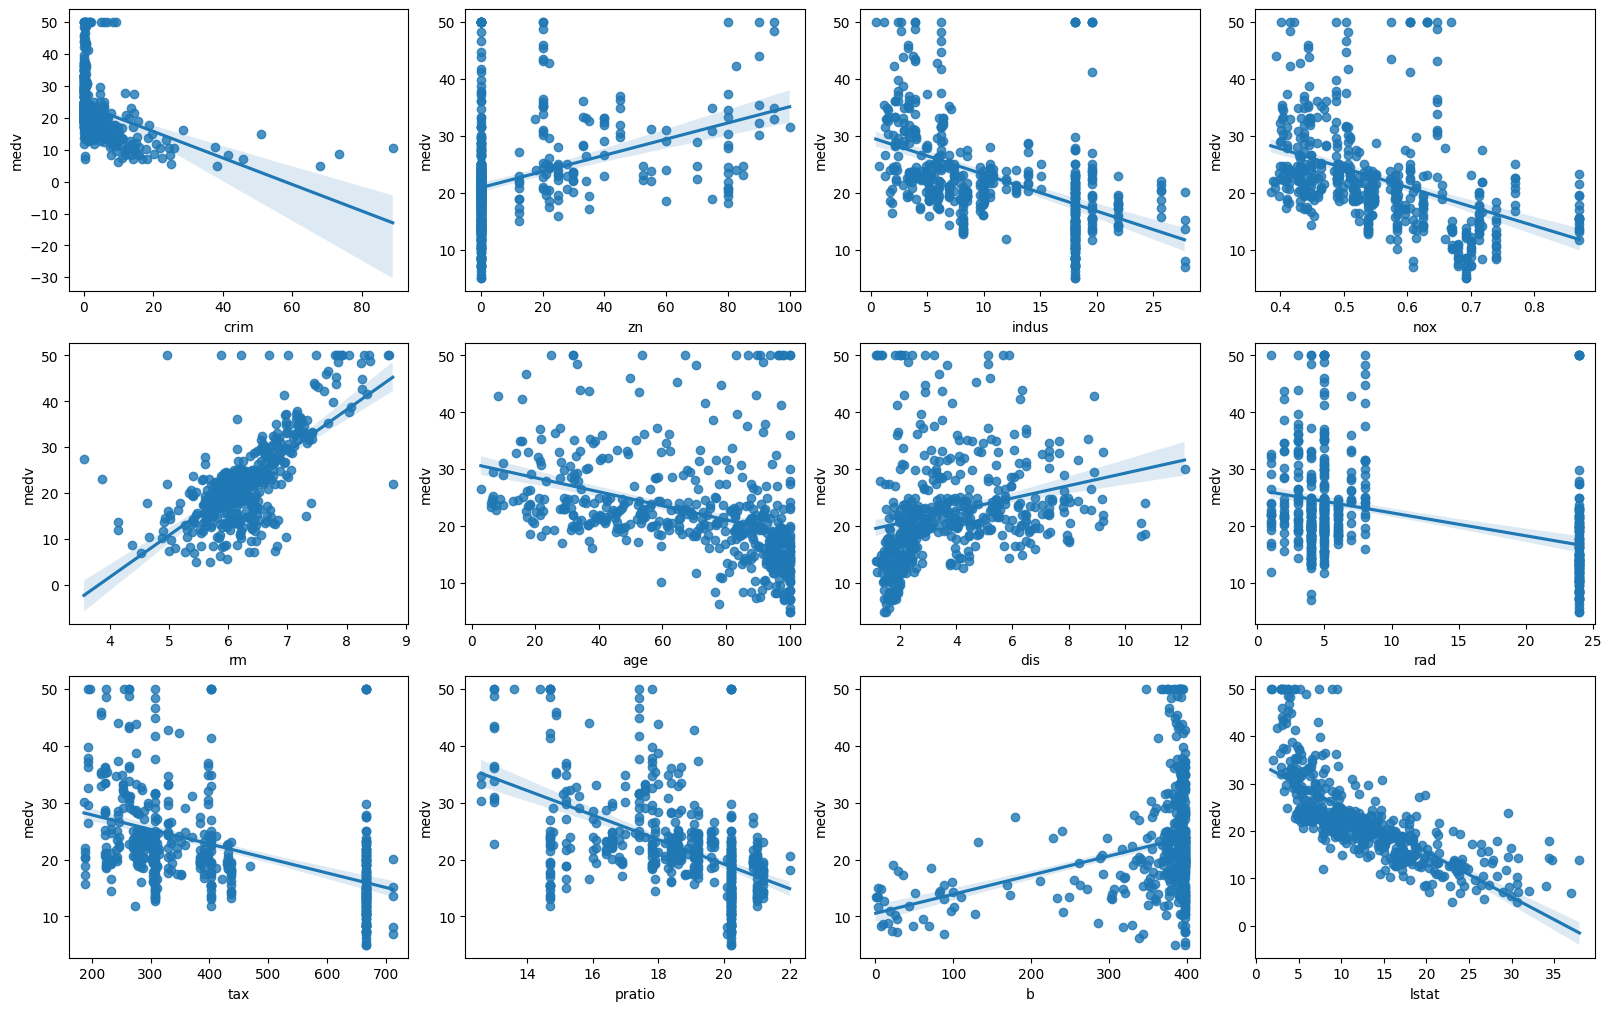

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 3개의 행과 4개의 열을 가진 subplot
fig, axs = plt.subplots(figsize = (16, 10), ncols = 4, nrows = 3, constrained_layout = True)
features = df.drop(['medv', 'chas'], axis = 1) # target과 범주형 변수 제외

for i, x in zip(range(12), features) :
    row = int(i/4) # 행번호 설정
    col = i % 4 # 열번호 설정
    # seaborn의 regplot을 이용해 산점도와 선형 회귀직선을 함께 시각화함
    sns.regplot(x = x, y = df['medv'], data = df, ax = axs[row][col])

12개의 변수는 주택 가격과 양 or 음의 선형관계임

## 2.데이터 분할

In [8]:
from sklearn.model_selection import train_test_split
x = df.drop(['medv'], axis = 1)
y = df[['medv']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 56)

In [9]:
# target변수의 평균을 확인하여 데이터가 잘 분할되었는지 임의로 확인함
print('train set의 집가격 평균', y_train.mean())
print('test set의 집가격 평균', y_test.mean())

train set의 집가격 평균 medv    22.309406
dtype: float64
test set의 집가격 평균 medv    23.417647
dtype: float64


## 3.전처리

Mix-max 정규화

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)

## 4.모델학습

In [11]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x_train_scaled, y_train)

LinearRegression()

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

pred_train = linear.predict(x_train_scaled) # train의 성능을 알아보기 위해 예측값 구함

In [13]:
mae = mean_absolute_error(y_train, pred_train)
mse = mean_squared_error(y_train, pred_train)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, pred_train)

print(f'MAE:{mae: .5f} \nMSE:{mse: .5f} \nRMSE:{rmse: .5f} \nR2:{r2: .5f}')

MAE: 3.23548 
MSE: 21.33114 
RMSE: 4.61856 
R2: 0.74014


모델의 설명력(R^2)는 74.0%로 양호하게 나왔다. MAE를 통해 pred_train과 y_train은 평균 3.24 정도 차이를 보인다는 것을 알 수 있다.

## 5.성능평가 및 예측값 저장

In [14]:
x_test_scaled = scaler.transform(x_test) # train set에 맞추어 min-max
pred = linear.predict(x_test_scaled) # 예측값

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)

print(f'MAE:{mae: .5f} \nMSE:{mse :.5f} \nRMSE:{rmse: .5f} \nR2:{r2: .5f}')

MAE: 3.43466 
MSE:24.59313 
RMSE: 4.95915 
R2: 0.73464


예측값과 실제값을 비교해 선형 회귀모델의 예측성능을 최종적으로 평가한다. 모델의 설명력은 R^2 = 66.4%로 나왔다. MAE를 통해 예측값과 실제값은 평균 3.43정도 차이를 보인다는 것을 알 수 있다.

In [16]:
# 실제값과 예측 결과를 비교하도록 data frame으로 저장하기

pred_df = pd.DataFrame(pred, columns = ['pred price'])
pred_df.head()

,pred price
0,8.343966
1,21.357920
2,26.498798
3,28.450297
4,33.204355


In [17]:
actual = pd.DataFrame(y_test, columns = ['medv'])
actual = actual.rename(columns = {'medv':'actual price'})
actual = actual.reset_index(drop = True)
actual.head()

,actual price
0,5.0
1,21.2
2,22.0
3,23.3
4,31.5


In [18]:
# concat하여 csv파일로 내보내기 및 저장
reg_result = pd.concat([actual, pred_df], axis = 1)
reg_result.to_csv('reg_result.csv', index = False, encoding = 'utf-8-sig')
reg_result.head()

,actual price,pred price
0,5.0,8.343966
1,21.2,21.357920
2,22.0,26.498798
3,23.3,28.450297
4,31.5,33.204355


In [19]:
# 다시 불러와서 제대로 저장 되었는지 확인
final = pd.read_csv('reg_result.csv')
final.head()

,actual price,pred price
0,5.0,8.343966
1,21.2,21.357920
2,22.0,26.498798
3,23.3,28.450297
4,31.5,33.204355


# Section 5. 분류분석

## 1.데이터 확인

In [26]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
df['Species'] = iris.target

각 행은 sepal의 길이와 너비 및 petal의 길이와 너비 정보를 cm로 나타내고 있고, 붓꽃은 3개의 종류를 가진다

In [27]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [28]:
df['Species'].unique()
# 0: Setisa, 1: Versicolor, 2: Viginica

array([0, 1, 2])

In [29]:
df.shape

(150, 5)

In [30]:
df.info()
# 결측값 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [31]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## 2.데이터 분할

데이터의 사이즈가 작은 편이므로 8:2로 나눈 뒤, train set으로 교차검증을 수행해 데이터 사이즈 문제를 극복하고자 한다.

원본 데이터를 train:test로 분할한 후, train set을 다시 train:validation으로 나눈다. 검증을 10회에 걸쳐 진행하도록 k-fold cv를 적용한다. 검증평가들의 평균으로 교차검증 최종평가를 결정한다.

검증 결과로 얻은 모델에 test set을 적용해 알고리즘 성능을 평가한다.

K-fold를 적용하는 것은 코드 작성상 '모델 학습'단계에서 진행

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop(['Species'], axis = 1), df[['Species']],
                                                    test_size = 0.2, random_state = 56, stratify = df['Species'])

In [41]:
print('train set :', x_train.shape, y_train.shape)
print('test set :', x_test.shape, y_test.shape)

train set : (120, 4) (120, 1)
test set : (30, 4) (30, 1)


## 3.전처리

iris 데이터는 독립변수가 모두 연속형이며 단위가 동일하기 때문에 표준화 or 정규화가 필요하지 않음.

결측치도 X

In [42]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

## 4.모델학습

In [43]:
from sklearn.tree import DecisionTreeClassifier
tree5 = DecisionTreeClassifier(max_depth = 5, random_state = 56)
tree3 = DecisionTreeClassifier(max_depth = 3, random_state = 56)
tree1 = DecisionTreeClassifier(max_depth = 1, random_state = 56)

cross_val_score 클래스에서 학습과 검증을 수행할 모델을 tree5로 설정하고, 평가 방법은 accuracy로 한다. 그리고 cv=10을 설정해 10-fold를 수행한다.

10회에 걸친 교차검증 정확도의 평균으로 최종평가를 결정한다.

In [44]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(tree5, x_train, y_train, cv = 10, scoring = 'accuracy')
print('교차검증 정확도:', np.round(scores, 3))
print('평균검증 정확도:', np.round(np.mean(scores), 4))

교차검증 정확도: [0.917 0.917 1.    0.917 1.    0.917 1.    0.917 0.833 0.917]
평균검증 정확도: 0.9333


In [45]:
scores = cross_val_score(tree3, x_train, y_train, cv = 10, scoring = 'accuracy')
print('교차검증 정확도:', np.round(scores, 3))
print('평균검증 정확도:', np.round(np.mean(scores), 4))

교차검증 정확도: [0.917 0.917 0.917 0.917 1.    1.    1.    0.917 0.833 0.917]
평균검증 정확도: 0.9333


In [46]:
scores = cross_val_score(tree1, x_train, y_train, cv = 10, scoring = 'accuracy')
print('교차검증 정확도:', np.round(scores, 3))
print('평균검증 정확도:', np.round(np.mean(scores), 4))

교차검증 정확도: [0.667 0.667 0.667 0.667 0.667 0.667 0.667 0.667 0.667 0.667]
평균검증 정확도: 0.6667


트리의 깊이를 5로 설정했을 때와 3으로 설정했을 때 정확도가 같으므로, 효율성을 고려하여 깊이3을 최종 모형으로 사용한다.

## 5.성능평가 및 예측값 저장

tree3 모델에 x_train, y_train을 fitting 한 후, prediction.

In [47]:
from sklearn.metrics import accuracy_score

tree3.fit(x_train, y_train) # 최종모형에 학습데이터 fitting
pred = tree3.predict(x_test) # 예측

print(f'Decision tree: {accuracy_score(y_test, pred): .5f}')

Decision tree:  0.96667


In [48]:
pred = pd.DataFrame(pred, columns = ['pred species'])
pred.head()

,pred species
0,1
1,0
2,2
3,2
4,0


In [55]:
actual = pd.DataFrame(y_test).rename(columns = {'Species':'actual species'}).reset_index(drop = True)
actual.head()

,actual species
0,1
1,0
2,2
3,2
4,0


In [56]:
classify_result = pd.concat([pred, actual], axis = 1) # 비교 위해 concat
classify_result.to_csv('classify_result.csv', index = False)

final = pd.read_csv('classify_result.csv') # 다시 불러와서 확인
final.head()

,pred species,actual species
0,1,1
1,0,0
2,2,2
3,2,2
4,0,0
